# 导入数据

In [33]:
import pandas as pd

data = pd.read_csv("../../dataset/rumor_preprocessed.csv")
data


,微博数,关注数,粉丝数,introduction,是否认证,点赞数,评论数,是否包含特殊符号,positive_prob,sentiment,confidence,negative_prob,abnormal
0,519,443,83,1,0,0,0,0,0.000280,0,0.999378,0.999720,0
1,7642,473,148000,1,1,3,0,0,0.113678,0,0.747381,0.886322,0
2,42534,527,240,0,0,0,0,0,0.000025,0,0.999944,0.999975,0
3,52954,748,3406000,1,1,0,0,1,0.226700,0,0.496222,0.773300,0
4,23797,1201,152,1,0,0,0,0,0.000429,0,0.999046,0.999571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,1350,63,102,1,0,3,0,1,0.019731,0,0.956153,0.980269,1
3142,4170,1025,874,1,1,0,4,1,0.878856,2,0.730792,0.121144,1
3143,15,2420,94,1,0,0,0,0,0.524300,1,0.513995,0.475700,1
3144,342,277,105,1,0,0,0,1,0.654422,2,0.232050,0.345578,1


# 可视化1

d:\miniconda3\envs\dataanalysis\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


d:\miniconda3\envs\dataanalysis\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
d:\miniconda3\envs\dataanalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


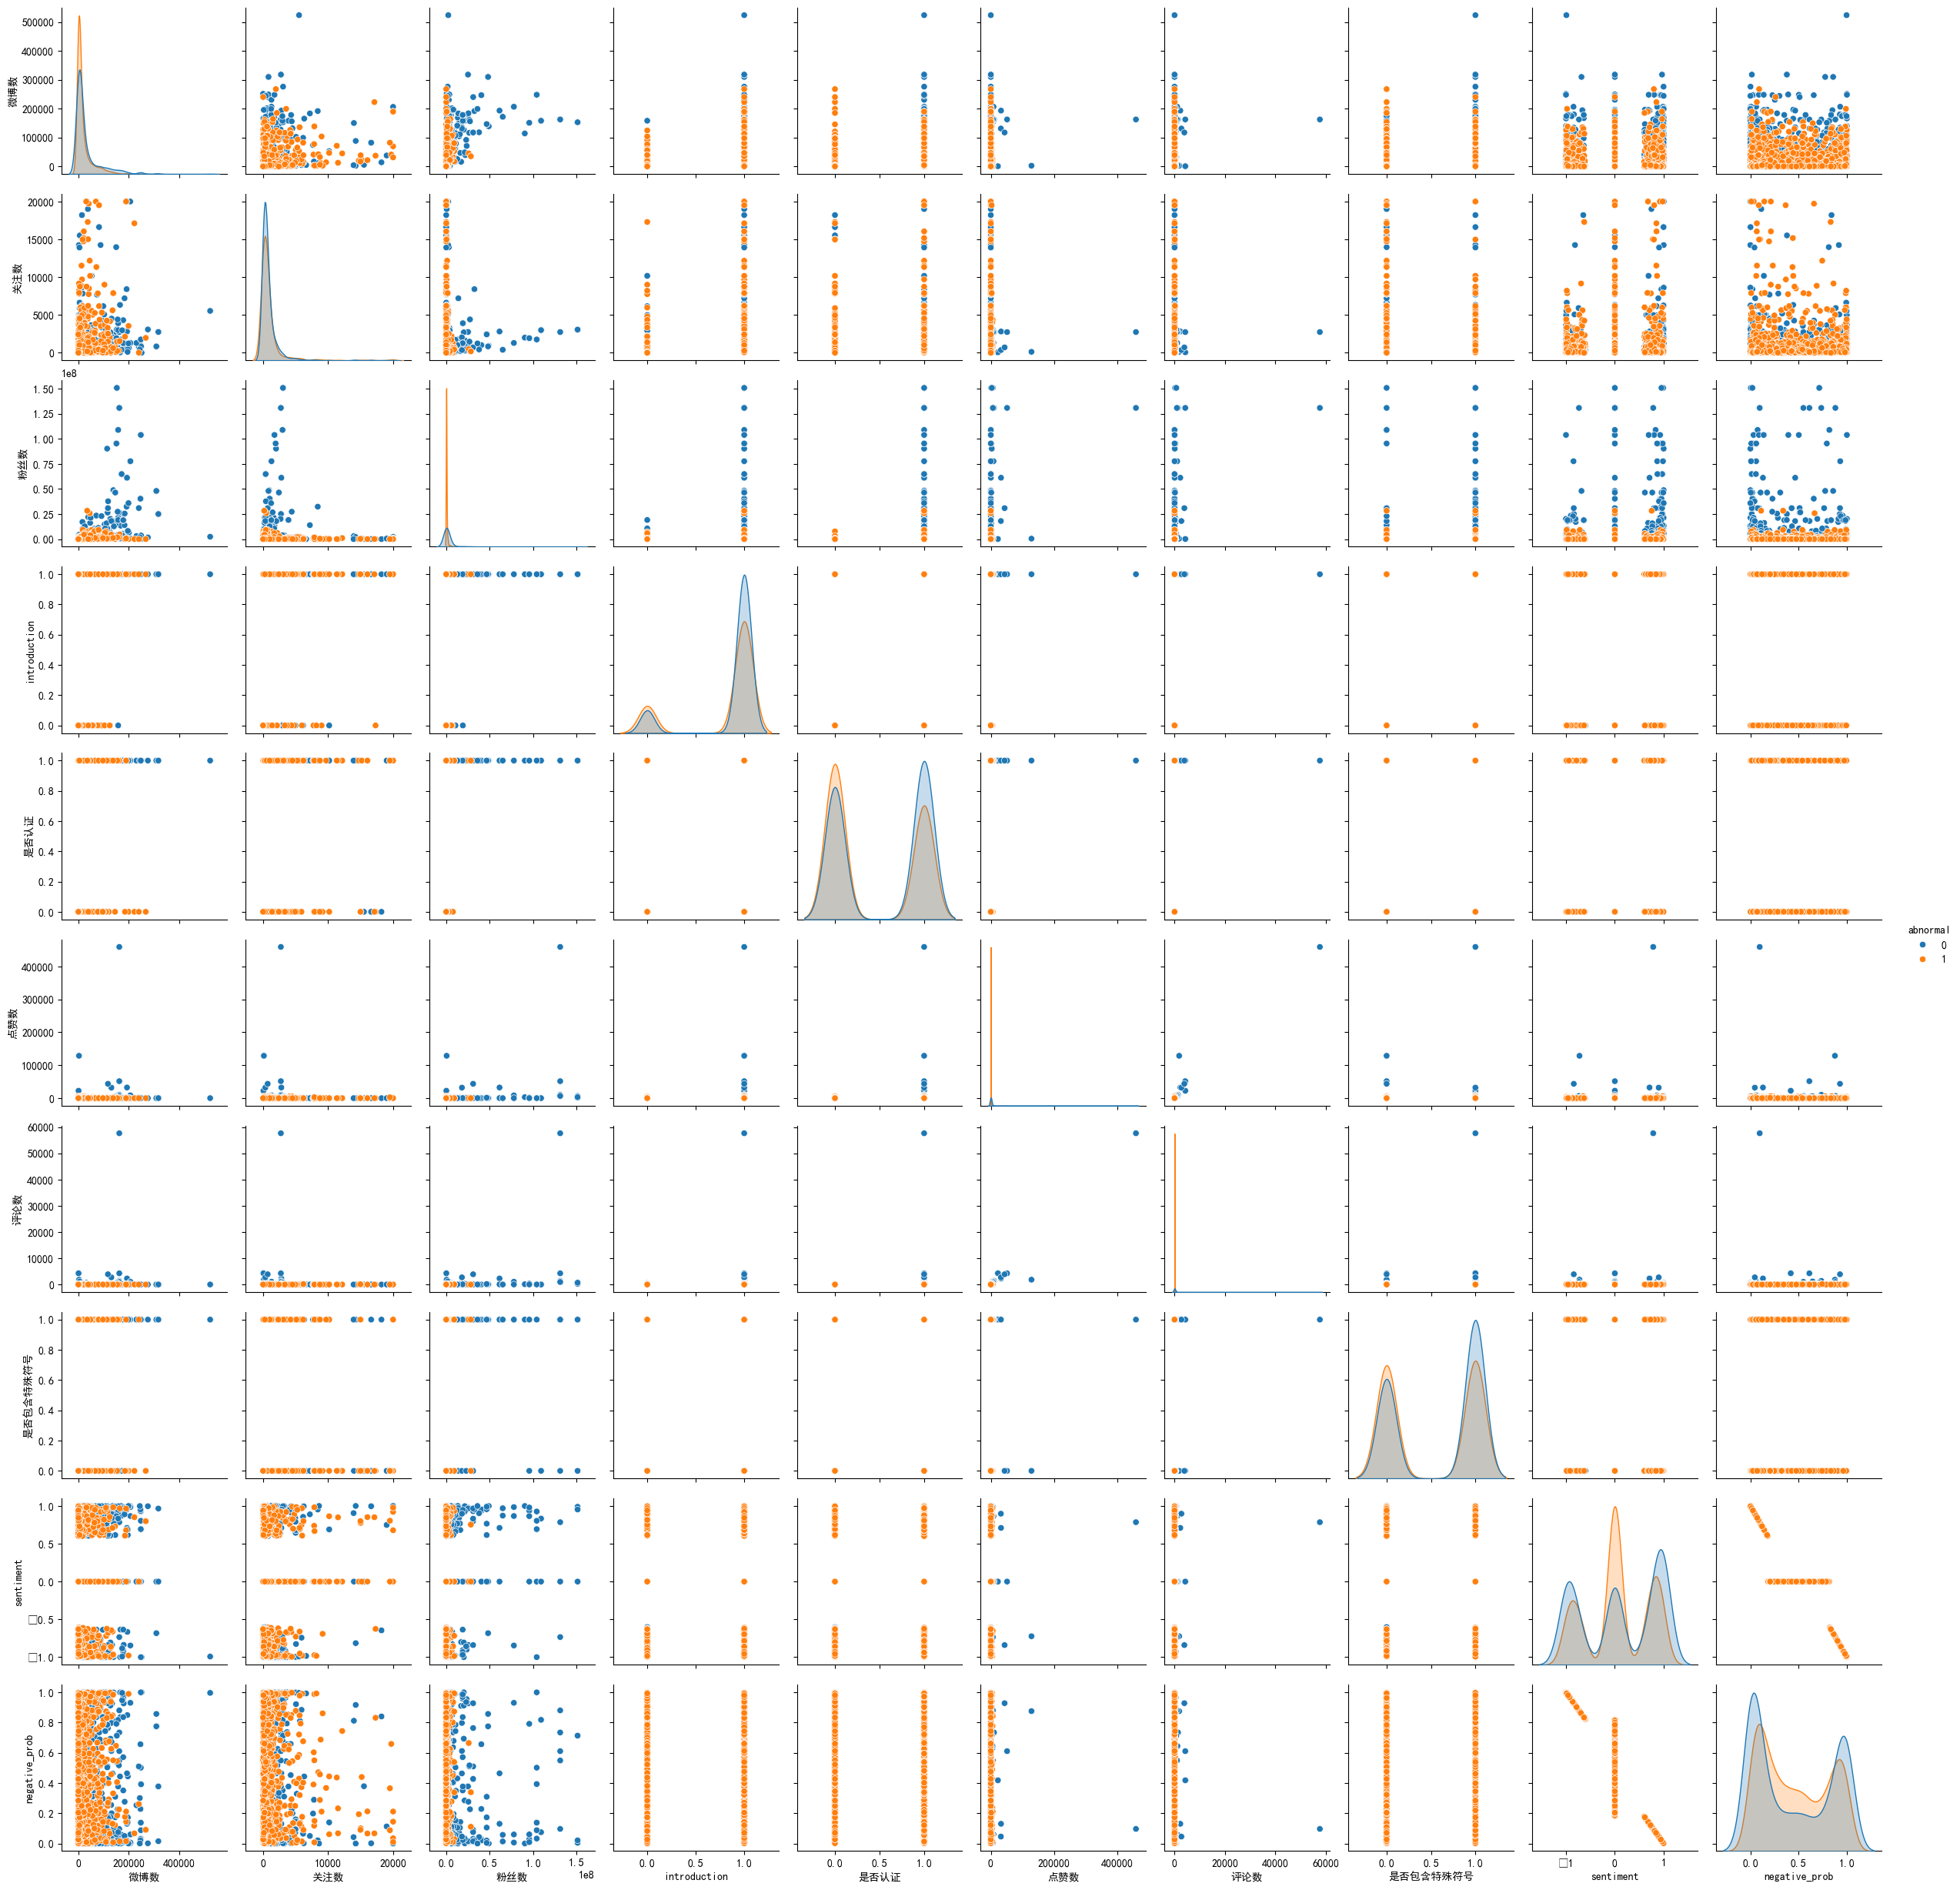

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]
sns.pairplot(data=data, hue="abnormal")

# negative_prob与abnormal 箱形图

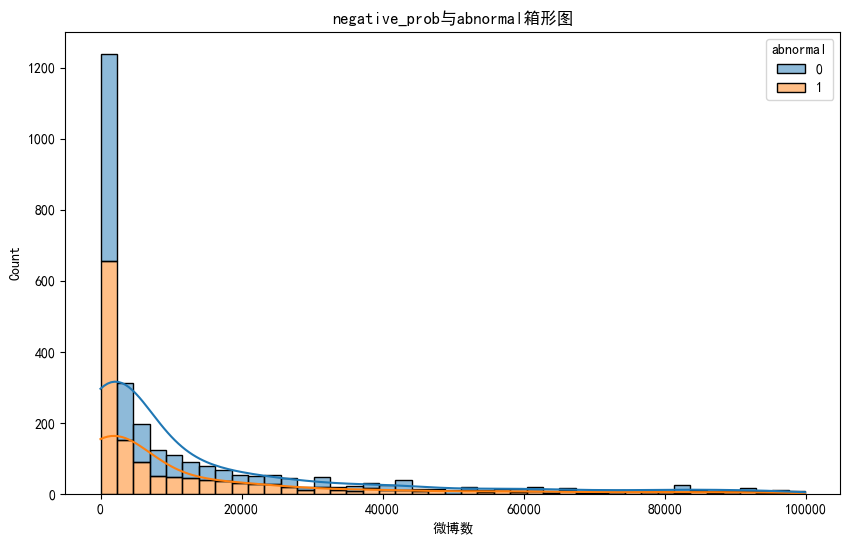

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"] = ["SimHei"]

plt.figure(figsize=(10,6))
sns.histplot(data=data.loc[:, ["微博数", "abnormal"]][data["微博数"] < 100000], x='微博数', hue='abnormal', kde=True, multiple="stack")
plt.title("negative_prob与abnormal箱形图")
plt.show()